In [78]:
import torch
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
from dataloader import CustomVOCDataset
from torch.utils.data import DataLoader
import torchvision.transforms.functional as F
import torchvision.transforms as transforms
from torchvision.transforms import InterpolationMode
from torchvision.models import ResNet50_Weights
from torchvision.models.segmentation import fcn_resnet50
from PIL import Image

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the pretrained model
# model = fcn_resnet50(weights=None, weights_backbone=ResNet50_Weights.IMAGENET1K_V1, num_classes=21)

# model.load_state_dict(
#     torch.load("/home/youxiang/Desktop/FYP/WSSS_method/best_model/weak_CE.pth")
# )

# model.to("cuda")
# model.eval()

In [79]:
palette = {
    0:  (0, 0, 0, 0),         # Black
    1:  (255, 0, 0, 153),       # Red
    2:  (0, 255, 0, 153),       # Green
    3:  (0, 0, 255, 153),       # Blue
    4:  (255, 255, 0, 153),     # Yellow
    5:  (0, 255, 255, 153),     # Cyan
    6:  (255, 0, 255, 153),     # Magenta
    7:  (128, 0, 0, 153),       # Maroon
    8:  (0, 128, 0, 153),       # Dark green
    9:  (0, 0, 128, 153),       # Navy
    10: (128, 128, 0, 153),     # Olive
    11: (0, 128, 128, 153),     # Teal
    12: (192, 192, 192, 153),   # Silver
    13: (128, 128, 128, 153),   # Gray
    14: (0, 192, 192, 153),     # Turquoise
    15: (192, 0, 192, 153),     # Fuchsia
    16: (192, 64, 0, 153),      # Red-orange
    17: (192, 192, 0, 153),     # Gold
    18: (0, 64, 128, 153),      # Darker navy
    19: (64, 128, 64, 153),     # Mid-green
    20: (192, 128, 64, 153),    # Tan
    255: (255, 255, 255, 0),    # White
}

classes = ['background','aeroplane','bicycle','bird', 'boat','bottle','bus','car','cat','chair',
           'cow','diningtable','dog','horse','motorbike','person','pottedplant','sheep',
           'sofa','train','tvmonitor', 'ambiguous']

def apply_palette(image, palette):
    # Create an empty RGB image with the same height and width as the input
    rgb_image = np.zeros((image.shape[0], image.shape[1], 4), dtype=np.uint8)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            class_index = image[i, j]
            rgb_values = palette[class_index]
            rgb_image[i, j, :] = rgb_values

    return rgb_image

In [80]:
pic = "2011_002975"
img_path = "/home/youxiang/Desktop/FYP/WSSS_method/VOCtrainval_11-May-2012/VOCdevkit/VOC2012/JPEGImages/{}.jpg".format(pic)
img_path2 = "/home/youxiang/Desktop/FYP/WSSS_method/VOCtrainval_11-May-2012/VOCdevkit/VOC2012/SegmentationClass/{}.png".format(pic)
input_image = Image.open(img_path).convert("RGB")
input_image2 = Image.open(img_path2)
input_image2_np = np.array(input_image2)
"""
2007_009245
2008_002240
2008_003885
2008_003886
2008_003976
2008_006722
2010_004556
2011_001665
2011_001713
2011_001812
2011_002975
"""
# preprocess = transforms.Compose([
#     transforms.Resize((256, 256), interpolation=InterpolationMode.BILINEAR),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
# ])

# input_tensor = preprocess(input_image).unsqueeze(0).to(device)

'\n2007_009245\n2008_002240\n2008_003885\n2008_003886\n2008_003976\n2008_006722\n2010_004556\n2011_001665\n2011_001713\n2011_001812\n2011_002975\n'

In [81]:
# with torch.no_grad():
#     output = model(input_tensor)["out"][0]
# output_predictions = torch.argmax(output, dim=0)

In [82]:
# output_predictions_np = output_predictions.cpu().numpy()
pred_paletted = apply_palette(input_image2_np, palette)
pred_mask = Image.fromarray(pred_paletted)
mask_resized = pred_mask.resize(input_image.size, Image.NEAREST)

In [83]:
# Visualization
# fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# ax[0].imshow(input_image)
# ax[0].set_title("Input Image")

# ax[1].imshow(pred_mask)
# ax[1].set_title("Segmentation Mask")

# plt.show()

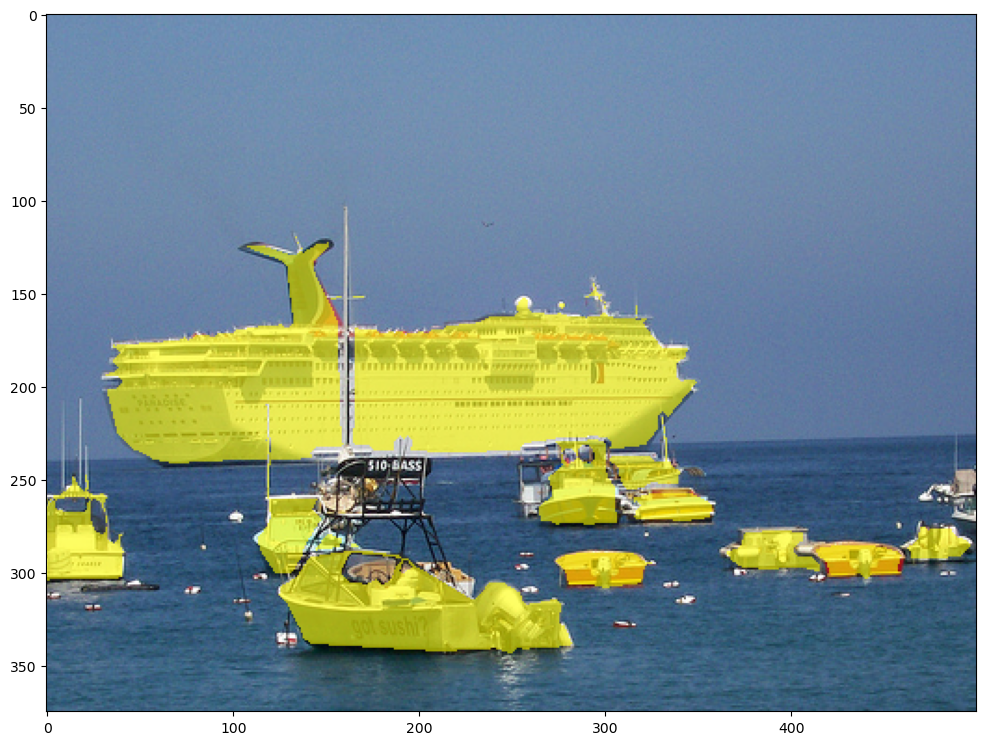

In [84]:
input_image.paste(mask_resized, (0, 0), mask_resized)
# overlayed = Image.blend(base, mask_overlay, 0.6)
plt.figure(figsize=[12, 12])
plt.imshow(input_image)